## Data Mining and Analysis Course Project Team Details:

### Team Id: 1A2

### Team Members:
Girish Mallya (64);
Baba Gouda patil (37);
Ganesh Gajakosh (59);
Ganesh Dubey (58)


## Title : Store Sales

## Problem Statement:
To predict sales for all the stores and the no of customers visiting the store,Analyze  the impact on sales  due to various factors such as holidays and competitor's store’s distances. 
and Analyze the impact on sales  based on the promotions offered by the stores.


### Dataset : Rossmann Store Sales dataset (https://www.kaggle.com/c/rossmann-store-sales)

### Description:
Rossmann operates over 3,000 drug stores in 7 European countries Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.



In [0]:
#Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
print ("Successfully imported all the necessary packages")
#Pandas is a python package which contains high level data structures and is used in data manipulation and analysis.
#Matplotlib is a plotting library in Python, which produces 2D graphics in different interactive environments.
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Populating the interactive namespace from numpy and matplotlib
Successfully imported all the necessary packages


In [0]:
import pandas as pd


### Reading the test and train data

In [0]:

#Reading the data
#train data contains the information about day of the week of sale, sales on that day, customers on that day, whether the store was open or not, whether it was a state holiday or a school holiday.
#store_data contains the information about the individual stores, such as what is the assortment, what is the competitor's store distances, since how long the competetors store has been open.

train_data=pd.read_csv("train.csv", low_memory=False)
store_data=pd.read_csv("store.csv")
test_data=pd.read_csv("test.csv")


In [0]:
#preview the data
train_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [0]:
store_data.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [0]:
test_data.head(20)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


### Data preprocessing begins here

In [0]:

#the information about the stores such as holidays, promos, etc and the information about the sales,competetion_distance,store_type etc are available in different datasets, we merge them to make the training data easier to read
print ("Merging the stores and sales data")
combined_train_data=pd.merge(train_data,store_data, on="Store")

Merging the stores and sales data


In [0]:
print ("Previewing the combined data")
combined_train_data.head(400)

Previewing the combined data


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## Removing noisy data
### Handling the NaN values : 

In [0]:

#Checking if there are any NaN rows
combined_train_data.isnull().values.any()

True

### True indicates that there are some NaN entries in the data, replacing those with zero

In [0]:
#There are some NaN in the data, such as promos, where if promo is not offered by the store, the NaN value is used in its place
#Replacing these NaN values with 0
combined_train_data.fillna(0, inplace=True)

In [0]:
combined_train_data.head(50)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [0]:
#Checking if there are any NaN values
combined_train_data.isnull().values.any()

False

#### Now it returns False, this means that the NaN entries have been sucessfully removed

## DATA TRANSFORMATION
### Reformating the date - from YYYY-MM-DD to DD-MM-YYYY

In [0]:
#First need to change the format of 'Date' Column to datetime
combined_train_data['Date'] = pd.to_datetime(combined_train_data['Date'], errors='coerce')
combined_train_data['Date'] = combined_train_data['Date'].dt.strftime('%d-%m-%Y')

In [0]:
combined_train_data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Store,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayOfWeek,5,4,3,2,1,7,6,5,4,3,2,1,7,6,5,4,3,2,1,7
Date,31-07-2015,30-07-2015,29-07-2015,28-07-2015,27-07-2015,26-07-2015,25-07-2015,24-07-2015,23-07-2015,22-07-2015,21-07-2015,20-07-2015,19-07-2015,18-07-2015,17-07-2015,16-07-2015,15-07-2015,14-07-2015,13-07-2015,12-07-2015
Sales,5263,5020,4782,5011,6102,0,4364,3706,3769,3464,3558,4395,0,4406,4852,4427,4767,5042,5054,0
Customers,555,546,523,560,612,0,500,459,503,463,469,526,0,512,519,517,550,544,553,0
Open,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0
Promo,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
StateHoliday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SchoolHoliday,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
StoreType,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c


### Creating seperate columns for month and Year to analyze the data better.


In [0]:
combined_train_data['Year'] = pd.DatetimeIndex(combined_train_data['Date']).year
combined_train_data['Month'] = pd.DatetimeIndex(combined_train_data['Date']).month

KeyboardInterrupt: 

In [0]:
#preview of the data after reformatting the date
combined_train_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,30-07-2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,29-07-2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,28-07-2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,27-07-2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,7,26-07-2015,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,25-07-2015,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,24-07-2015,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,23-07-2015,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,22-07-2015,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### Converting 'DayOfWeek' from numerical form to weekday name, so as to make the data easier to understand


In [0]:
combined_train_data['Date'] = pd.to_datetime(combined_train_data['Date'])
combined_train_data['DayOfWeek'] = combined_train_data['Date'].dt.weekday_name

In [0]:
combined_train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,Friday,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,Thursday,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,Wednesday,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,Tuesday,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,Monday,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


## Handling missing values  :
### After running the removal of NaN all the missing values in CompetitionDistance have been replaced with zeros
### These are considered as missing values
### Checking if there are any zeros 

In [0]:
(combined_train_data['CompetitionDistance'] == 0).any()

True

### It has return True which means that there are missing values
### We have chosen to replace these values with the median because, Median is the best measure of central tendency for large data

In [0]:
#Some CompetitionDistance values are blank in the Data, We have assumed this to mean that the data of nearest competetor stores couldn't be found, therefore, these values are replaced with Median distance. '
median_cd = combined_train_data['CompetitionDistance'].median(skipna=True)

In [0]:
combined_train_data['CompetitionDistance']=combined_train_data.CompetitionDistance.mask(combined_train_data.CompetitionDistance == 0,median_cd)

### Removal of unnecessary entries 

In [0]:
# remove all rows(store,date) that are closed as this data doesn't help in predicting the sales on the working days
combined_train_data = combined_train_data[combined_train_data["Open"] != 0]
initial_size= combined_train_data.shape[0]

In [0]:
#Performing the same merge operation on test data
combined_test_data=pd.merge(test_data,store_data, on="Store")

### Similar Techniques are used to handle the noisy values as the Train Data

In [0]:
#Preview the test data
print ("Previewing the combined test data")
combined_test_data.head()

Previewing the combined test data


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [0]:
#Handling the NaN values, first checking if there are any NaN
combined_test_data.isnull().values.any()

True

In [0]:
#Replacing the NaN values with 0
combined_test_data.fillna(0, inplace=True)

In [0]:
#checking again for NaN

In [0]:
combined_test_data.isnull().values.any()

False

In [0]:
#Reformating the date - from YYYY-MM-DD to DD-MM-YYYY for better readability
#First need to change the format of 'Date' Column to datetime
combined_test_data['Year'] = pd.DatetimeIndex(combined_test_data['Date']).year
combined_test_data['Month'] = pd.DatetimeIndex(combined_test_data['Date']).month

In [0]:
#Preview the test data
print ("Previewing the combined test data")
combined_test_data.head()

Previewing the combined test data


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9


In [0]:
#Converting 'DayOfWeek' from numerical form to weekday name, so as to make the data easier to understand
combined_test_data['Date'] = pd.to_datetime(combined_test_data['Date'])
combined_test_data['DayOfWeek'] = combined_test_data['Date'].dt.weekday_name

In [0]:
#Drop the days where the store has remained closed as there is no point in that data being present for the test data
combined_test_data = combined_test_data[combined_test_data["Open"] != 0]

### Dealing with Outliers 

In [0]:
# Python Function to remove outliers
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

### Since the Data is very large, it isn't easy to observe and detect outliers, therefore we have applied the turkey method of detecting the outliers using Inter-Quartile-range(IQR)


In [0]:
##The formulas are:
##Low outliers = Q1 – 1.5(Q3 – Q1) = Q1 – 1.5(IQR)
##High outliers = Q3 + 1.5(Q3 – Q1) = Q3 + 1.5(IQR)
#Where:
#Q1 = first quartile
#Q3 = third quartile
#IQR = Interquartile range
Q1 = combined_train_data['CompetitionDistance'].quantile(0.25)
Q3 = combined_train_data['CompetitionDistance'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR is ")
print (IQR)
max_value= Q3 + 1.5*IQR
print ("Max Value is")
print (max_value)

#Since all the CompetitionDistance Data are positive, there are no "outliers" (by the present definition) on the low side.
#Therfore we can assign the min_value to 0
min_value=0

IQR is 
6170.0
Max Value is
16135.0


In [0]:
combined_train_data = remove_outliers(df = combined_train_data, column = 'CompetitionDistance', min_val = 0, max_val = max_value)
final_size=combined_train_data.shape[0]

In [0]:
#method2
combined_train_data[np.abs(combined_train_data.CompetitionDistance-combined_train_data.CompetitionDistance.mean())<=(3*combined_train_data.CompetitionDistance.std())]
combined_train_data.shape[0]

844392

In [0]:
print("Preview the data after removal of outliers")
combined_train_data.head(30)

Preview the data after removal of outliers


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
10,1,2,2015-07-21,3558,469,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [0]:
print("performing the same removal of outliers for test data")

performing the same removal of outliers for test data


In [0]:
combined_test_data = remove_outliers(df = combined_test_data, column = 'CompetitionDistance', min_val = 0, max_val = max_value)

C:\Users\Hp\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
C:\Users\Hp\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


In [0]:
#Taking the information about stores, Customers and CompetitionDistance 
dfi=combined_train_data[['Store','Customers','CompetitionDistance']]

In [0]:
#dfi=dfi.groupby(['Store','CompetitionDistance'],as_index=False)['Customers'].sum()

In [0]:
data_size_after_outliers= combined_train_data.shape[0]
print(data_size_after_outliers)

844392


### converting ungrouped data to grouped

In [0]:
#Since the competition distance of the stores are in ungrouped data, we are going to group it, into classes of width 2000.
#And we are going to calculate the number of customers that visit the stores at each of these classes.


l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfi = dfi.groupby(pd.cut(dfi['CompetitionDistance'], bins=b, labels=l))['Customers'].sum().fillna(0).reset_index()

In [0]:
dfi.head(23)
#After seeing the results you might be thinking, why are more customers going to the shops which have competition nearby,
#Observationally, one can determine, that more customers are going to the stores which have competitors nearby.
#This data in itself is not sufficient to analyze, the information, because we have not found out how many stores are there which fall into the groups

,CompetitionDistance,Customers
0,0-2000,335696813
1,10000-12000,11615833
2,12000-14000,12208906
3,14000-16000,13485316
4,16000-18000,12538128
5,18000-20000,12158500
6,2000-4000,104662929
7,20000-22000,8434676
8,22000-24000,5747763
9,4000-6000,53514645


In [0]:
#We need information about the number of stores that fall in the various competitionDistance groups
#dfs is the dataframe that stores only the relevant information about the stores, the ones which we are interested in, Store, and CompetitionDistance
dfs=store_data[['Store','CompetitionDistance']]

In [0]:
#Similar to how we had done above, we group the CompetitionDistance in classes of 2000 distances and counting the number of stores that come in each of these distances
l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfs = dfs.groupby(pd.cut(dfs['CompetitionDistance'], bins=b, labels=l))['Store'].count().fillna(0).reset_index()

In [0]:
dfs.head(10)

,CompetitionDistance,Store
0,0-2000,502
1,10000-12000,26
2,12000-14000,27
3,14000-16000,26
4,16000-18000,26
5,18000-20000,25
6,2000-4000,202
7,20000-22000,14
8,22000-24000,9
9,4000-6000,103


In [0]:
#Merge the data set that holds the information about the total customers and the number of stores in each distance range, so that we can get both the information in the sane table
df=pd.merge(dfi,dfs,on="CompetitionDistance")

In [0]:
df.head()

,CompetitionDistance,Customers,Store
0,0-2000,335696813,502
1,10000-12000,11615833,26
2,12000-14000,12208906,27
3,14000-16000,13485316,26
4,16000-18000,12538128,26


In [0]:
#The best metric to analyze how CompetitorDistance is affecting the sales is my measuring the average customer per store at each of these classes of distances
df['Customer/Store'] = df['Customers']/df['Store']

In [0]:
df.head(14)

,CompetitionDistance,Customers,Store,Customer/Store
0,0-2000,335696813,502,668718.750996
1,10000-12000,11615833,26,446762.807692
2,12000-14000,12208906,27,452181.703704
3,14000-16000,13485316,26,518666.000000
4,16000-18000,12538128,26,482235.692308
5,18000-20000,12158500,25,486340.000000
6,2000-4000,104662929,202,518133.311881
7,20000-22000,8434676,14,602476.857143
8,22000-24000,5002194,9,555799.333333
9,4000-6000,53514645,103,519559.660194


### Data Visualization

In [0]:
#Plot the information about  Customers/Store 
df.plot(x='CompetitionDistance',y='Customer/Store')

NameError: name 'df' is not defined

### Does it logically make sense? more customers in the stores which have competition Nearby? No, it doesn't. The explaination for why this might be is below

In [0]:
#There is an attribute 'Promo' in the dataset, which determines if the store is offering a promo or not
#We are trying to analyze if this promo is what is affecting the customers count in the stores having competitions nearby,
dfs1=combined_train_data[['Store','Customers','Promo','Sales','CompetitionDistance']]

In [0]:
#Take only those stores which are offering promos.
dfs1= dfs1[dfs1["Promo"] != 0]

In [0]:
#Classify CompetitionDistance similar to how it was done above.
#Count the number of stores in each class which are offering promo
l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfs1 = dfs1.groupby(pd.cut(dfs1['CompetitionDistance'], bins=b, labels=l))['Store'].count().fillna(0).reset_index()

In [0]:
dfs1=dfs1.rename(columns={'Store' : 'NoOfDaysPromosOffered'})

In [0]:
dfs1.head()

,CompetitionDistance,NoOfDaysPromosOffered
0,0-2000,169660
1,10000-12000,8691
2,12000-14000,9009
3,14000-16000,8912
4,16000-18000,8566


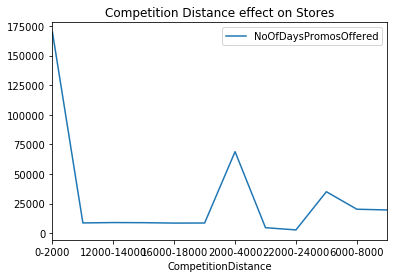

In [0]:
#Plot the information
dfs1.plot(x='CompetitionDistance',y='NoOfDaysPromosOffered',title='Competition Distance effect on Stores')

### This means that the stores who have competition Nearby, they are aggressively promoting their offers

In [0]:
#Taking only information about Promo, to analyze how many customers will visit the stores if there's Promo Offered or not offered
dfnp = combined_train_data[combined_train_data["Promo"] != 1]
#dfnp is the dataframe that represents no_promo.

In [0]:
#Finding out the totalnumber of days Promo was not offered
no_of_daysNPromo=dfnp.shape[0]
print(no_of_daysNPromo)

467496


In [0]:
dfp= combined_train_data[combined_train_data["Promo"] != 0]
#dfnp is the dataframe that represents promo.
no_of_daysPromo=dfp.shape[0]
#Finding out the totalnumber of days Promo was offered

print(no_of_daysPromo)

376896


In [0]:
#calculating the total customers in each store when promo was offered
dfp=dfp.groupby(by=['Store'])['Customers'].sum()

In [0]:
#calculating the total customers in each store when promo was not offered
dfnp=dfnp.groupby(by=['Store'])['Customers'].sum()

In [0]:
dfnp.head()

Store
1    232615
2    213522
3    277873
4    545353
5    189204
Name: Customers, dtype: int64

In [0]:
dfp.head()

Store
1    207908
2    244333
3    306437
4    490901
5    229384
Name: Customers, dtype: int64

In [0]:
#Calculating the total customers who visit a store if Promo is not offered
sum_without_promo=dfnp.sum()
sum_without_promo

325777807L

In [0]:
#calculating the total customers who visit a store if Promo is offered
sum_with_promo=dfp.sum()
sum_with_promo

318263948L

In [0]:
#Dividing by the total number of days promo was offered, we get the average customer per day in case of promo being offered
customersPerDay=sum_with_promo/no_of_daysPromo
#This is the average customers per day if Promo was offered

In [0]:
print(customersPerDay)

844


In [0]:
#dividing by the total number of days promo was not offered, we get the average customer per day in case of promo being offered
customersPerDay2=sum_without_promo/no_of_daysNPromo
#this is the average customers per day if promo was offered

In [0]:
print(customersPerDay2)

696


In [0]:
#Creating a dataframe to hold these 2 averages. so that we can plot the information and visualize it.
ts1=['Promo','NoPromo']
#creating a list to store the 'offer'
ts2=[customersPerDay,customersPerDay2]
#creating a list to store the averages.
cust=pd.DataFrame(ts2,columns=['CustomersPerDay'])
#creating a dataframe to hold average customers.

In [0]:
cust.head()

,CustomersPerDay
0,844
1,696


In [0]:
cust2=pd.DataFrame(ts1,columns=['Offer'])
#Creating a dataframe to hold Offer

In [0]:
cust2.head()

,Offer
0,Promo
1,NoPromo


In [0]:
#Creating a row temp with val 1 so that we can have a common column to perform merge on
cust['tmp']=1
cust2['tmp']=1

In [0]:
dfc=pd.merge(cust,cust2,on=['tmp'])

In [0]:
dfc.head()

,CustomersPerDay,tmp,Offer
0,844,1,Promo
1,844,1,NoPromo
2,696,1,Promo
3,696,1,NoPromo


In [0]:
#Dropping redundant indices
dfc=dfc.drop(dfc.index[[1,2]])

In [0]:
#dropping the temporary column we created to merge
dfc=dfc.drop('tmp', axis=1)

In [0]:
dfc.head()

,CustomersPerDay,Offer
0,844,Promo
3,696,NoPromo


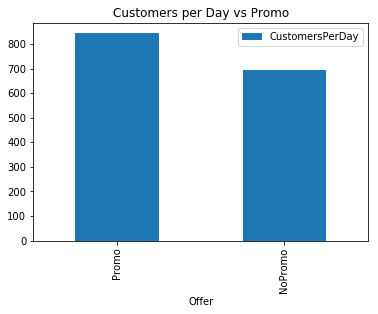

In [0]:
dfc.plot(kind='bar', x='Offer',title='Customers per Day vs Promo')
#plotting a bar graph to represent the above data


### It can be seen that Customers Per Day are higher in case of Promo being offered compared to Not being offered

In [0]:
#dfso is the dataframe when store is open
dfso= combined_train_data[combined_train_data["Open"] != 0]

In [0]:
#dfs1 is the dataframe which includes only those stores that were open on a SchoolHoliday
dfs1= dfso[dfso["SchoolHoliday"] == 1]
#dfs2 is the dataframe which includes only those stores that were open on a StateHoliday
dfs2= dfso[dfso["StateHoliday"]==1]
print(dfs2.shape[0])

0


In [0]:
#dfs2 is null

In [0]:
#Calculating the total Customers Per who visit the store on a schoolholiday
dfs1=dfs1.groupby(by=['Store'])['Customers'].sum()

In [0]:
#the total number of days the store was open on a schoolholiday
Count=dfs1.shape[0]

In [0]:
#Calculating the Average 
AvgCustPerStore=dfs1.sum()/Count

In [0]:
#Average customers per Store if store is open on holidays
print(AvgCustPerStore)

114804


In [0]:
#dfs3 is a dataframe that holds information about the stores that remain closed on a schoolholiday
dfs3=dfso[dfso['SchoolHoliday']!=1]

In [0]:
#calculating the total customers that visit the stores that are closed on schoolholidays
dfs3=dfs3.groupby(by=['Store'])['Customers'].sum()

In [0]:
#calculating the number of days the stores were open 
Count2=dfs3.shape[0]

In [0]:
#calculating the average
AvgCustPerStore2=dfs3.sum()/Count2

In [0]:
print(AvgCustPerStore2)

462811


In [0]:
#Creating a dataframe to store these 2 averages so that we can display a bar graph for this infromation
ts2=[AvgCustPerStore,AvgCustPerStore2]

In [0]:
cust3=pd.DataFrame(ts2,columns=['CustomersPerStore'])

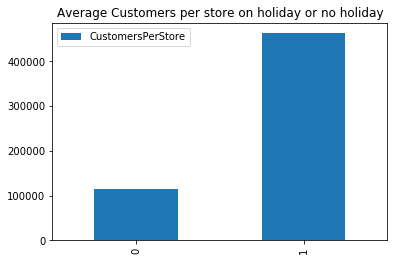

In [0]:
cust3.plot(kind='bar',title='Average Customers per store on holiday or no holiday')

### 0 Bar represents the AvgCustomersPerStore on SchoolHolidays

### 1 Bar represents the AvgCustomerPerStore on Days other than schoolHolidays

In [0]:

#Determining how Assortment affects the Customers.
dfsa=combined_train_data.groupby(by=['Assortment'])['Customers'].mean()
#dfsa is a dataframe that stores the data about each assortment type and the total customers that visit these stores.

In [0]:
dfsa.head()

Assortment
a     747.943822
b    2066.795543
c     752.169959
Name: Customers, dtype: float64

### visualize how Customers vary according to assortments

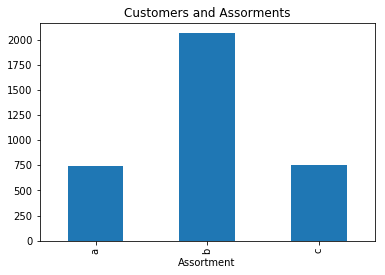

In [0]:
#Plotting a bar chart to 
dfsa.plot(kind='bar',title='Customers and Assorments')

In [0]:
#Determining how StoreType affects the Customers
dfss=combined_train_data.groupby(by=['StoreType'])['Customers'].sum()
#dfss is the dataframe that is holding the information about the total customers that visit each store type.

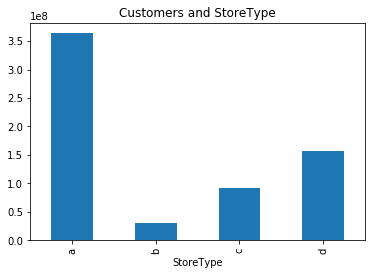

In [0]:
#plotting a bar graph to visualize how customers vary as store type varies 
dfss.plot(kind='bar',title='Customers and StoreType')

In [0]:
#Determining how DayOfTheWeek Affects the totalCustomers
dfsd=combined_train_data.groupby(by=['DayOfWeek'])['Customers'].sum()
#dfsd is the dataframe that holds the infromation about the Total customers that visit the store each day

In [0]:
dfsd.head(7)

DayOfWeek
Friday       103663000
Monday       103822824
Saturday      92327469
Sunday        39554297
Thursday      96233782
Tuesday      110426213
Wednesday     98014170
Name: Customers, dtype: int64

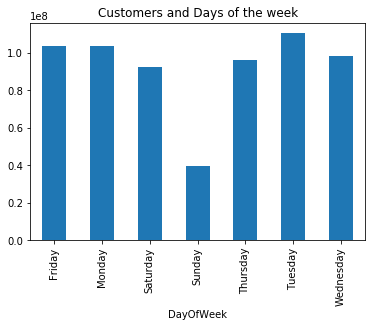

In [0]:

#displaying a bar graph to represnt how customers vary throughout the days of the week
dfsd.plot(kind='bar',title='Customers and Days of the week')

In [0]:
#Determining how DayOfTheWeek Affects the total sales
dfsd=combined_train_data.groupby(by=['DayOfWeek'])['Sales'].sum()
#dfsd is the dataframe that holds the infromation about the Total customers that visit the store each day

In [0]:
dfsd.head(7)

DayOfWeek
Friday        938010989
Monday        980305411
Saturday      824015716
Sunday        354247910
Thursday      861688546
Tuesday      1023536329
Wednesday     891375722
Name: Sales, dtype: int64

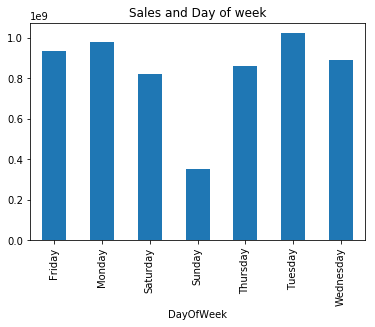

In [0]:
#displaying a bar graph to display how sales vary acording to the day of the week
dfsd.plot(kind='bar',title='Sales and Day of week')

In [0]:
#PromoInterval describes the consectuive intervals promo2 is started, naming the months and promotion started anew.
#eg- "Feb,May,Aug,Nov" means each round of promotion starts in February, May, August, November of any given year
dfsd=combined_train_data.groupby(by=['PromoInterval'])['Sales'].sum()

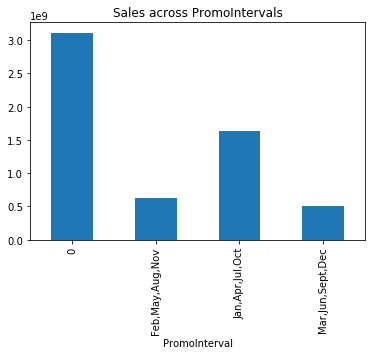

In [0]:
#Visualizing how sales have varried across various PromoIntervals
dfsd.plot(kind='bar',title='Sales across PromoIntervals')

In [0]:
#Promo2SinceWeek is a attribute which represents which calender week the store is participating in continuous Promotion
dfp1=combined_train_data[combined_train_data['Promo2SinceWeek']!=0]
#we don't want the stores that are not participating in continuous promotion 
#therefore we remove those stores whose promo2sinceweek is 0

In [0]:
dfp1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
942,2,Friday,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
943,2,Thursday,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
944,2,Wednesday,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
945,2,Tuesday,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
946,2,Monday,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7


In [0]:
dfp1=dfp1.groupby(by=['Promo2SinceWeek'])['Sales'].sum()

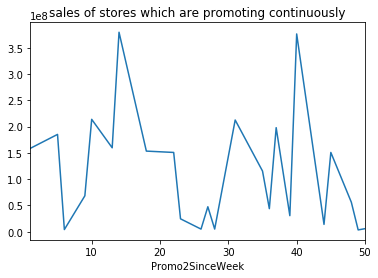

In [0]:
dfp1.plot(title='sales of stores which are promoting continuously')

In [0]:
#To determine how average sales have varied as Competitor has started.
#for example, let's take store_id = 5
store_id = 5
#taking only the information relevant to the store id of choice
dfs5 = combined_train_data[combined_train_data["Store"] == store_id]
#calculating the average sales per day for the store id of choice
average_store_sales = dfs5.groupby('Date')["Sales"].mean()

###  how average sales have varied as Competitor has started.

In [0]:
#finding the year and month of the introduction of the Competitor
y = combined_train_data["CompetitionOpenSinceYear"].loc[combined_train_data["Store"]  == store_id].values[0]
m = combined_train_data["CompetitionOpenSinceMonth"].loc[combined_train_data["Store"] == store_id].values[0]

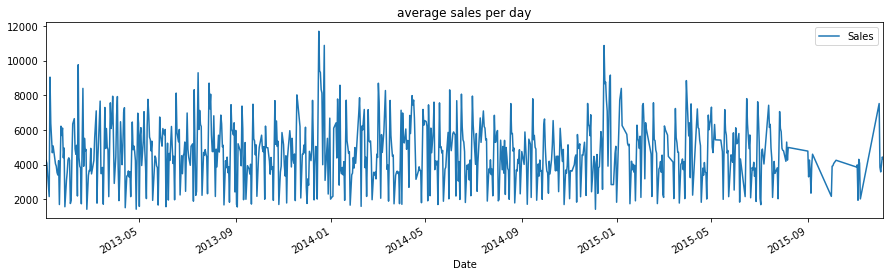

In [0]:
#plot the average sales per day
ax=average_store_sales.plot(legend=True,figsize=(15,4),title='average sales per day')
#Make sure that the competitor was introduced after 2013, because the training data only has information from 2013 to 2015 
if y >= 2013:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='red')
    

### line to indicate the month that the Competitor was introduced

In [0]:
#model
# Notice that test_df has only year=2015, and months 8 & 9

# drop Year and Month
combined_train_data.drop(["Year", "Month"], axis=1, inplace=True)

ValueError: labels ['Year' 'Month'] not contained in axis

In [0]:
# drop unnecessary columns, these columns won't be useful in prediction
combined_train_data.drop(["Open", "Date"], axis=1, inplace=True)

ValueError: labels ['Open' 'Date'] not contained in axis

In [0]:
combined_train_data.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,NewAssortment
0,1,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1
1,1,4,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1
2,1,3,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1
3,1,2,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1
4,1,1,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1


In [0]:
# save ids of closed stores, because we will assign their sales value to 0 later(see below)
closed_store_ids = test_data["Id"][test_data["Open"] == 0].values

# remove all rows(store,date) that were closed
combined_test_data = test_data[test_data["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
combined_test_data.drop(['Open', 'Date'], axis=1,inplace=True)



C:\Users\Hp\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### mapping of categorical data to numerical data to use in regressions
As we can only use numerical data in regression 

In [0]:

equiv = {'a':1, 'b':2, 'c':3}
combined_train_data["NewAssortment"] = combined_train_data["Assortment"].map(equiv)
#combined_test_data["NewAssortment"] = combined_test_data["Assortment"].map(equiv)


equiv1 = {'a':1, 'b':2, 'c':3 , 'd':4}
combined_train_data["NewStoreType"] = combined_train_data["StoreType"].map(equiv1)
#combined_test_data["NewStoreType"] = combined_test_data["StoreType"].map(equiv1)


## Predicting Sales from Regression

In [0]:
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [0]:
from pandas import Series,DataFrame

In [0]:
combined_train_data1 = combined_train_data.sample(frac=0.2) # this is now a random sample of half the dataframe
combined_train_data1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,NewAssortment,NewStoreType
441985,484,4,2013-05-23,5635,625,1,0,0,0,a,c,14300.0,3.0,2011.0,0,0.0,0.0,0,3,1
360057,395,3,2014-09-17,3984,512,1,1,0,0,a,a,3620.0,2.0,2013.0,0,0.0,0.0,0,1,1
686403,754,6,2013-11-09,6687,852,1,0,0,0,c,c,380.0,5.0,2008.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",3,3
825794,907,5,2015-03-27,6194,836,1,0,0,0,a,c,250.0,0.0,0.0,0,0.0,0.0,0,3,1
826249,907,5,2013-12-27,6281,839,1,0,0,1,a,c,250.0,0.0,0.0,0,0.0,0.0,0,3,1


## Splitting Train Data into 70% train data and 30% test data

In [0]:
# create X and y
feature_cols = ['CompetitionDistance','Promo','Promo2','NewAssortment','NewStoreType']
X = combined_train_data1[feature_cols]
y = combined_train_data1.Sales
y1 = combined_train_data1.Customers
test=combined_test_data

In [0]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test =cross_validation.train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
labels_train.head()

622689    5255
266829    8457
892433    4852
848255    5255
540376    7175
Name: Sales, dtype: int64

## Building a Regression Model to Predict Sales

### Linear regression 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,accuracy_score
train_er1={}
val_er1={}
i=0
mod1={}
def linear_reg(n,w,q,q5,features_train,features_test,labels_train,labels_test):
# Create linear regression object
        regr = linear_model.LinearRegression(fit_intercept=n, normalize=True, copy_X=False, n_jobs=1)
        # Train the model using the training sets
        regr.fit(features_train, labels_train)
# Make predictions using the testing set
        pred = regr.predict(features_train)
        pred1= regr.predict(features_test)

#print(accuracy_score(labels_train,pred))
        print 'For the parameter fit_intercept:',n
        print'train error:',mean_absolute_error(labels_train,pred)
        print'validation error:',mean_absolute_error(labels_test,pred1)
        train_er1[i]=mean_absolute_error(labels_train,pred)
        val_er1[i]=mean_absolute_error(labels_test,pred1)
        k=val_er1[i]-train_er1[i]
        if(k<0):
            k=k*-1
        if(train_er1[i]<w):
            w=train_er1[i]
            if(k<q):
                q=k
                fit_ncpt=d[i]
                q5=i-1
        print'********************************************************'
        return q5,w,q,train_er1[i],val_er1[i]

In [0]:
d={1:True,2:False}
w=100000
q=100000
q5=0
fit_ncpt=False
for i in d:
    q5,w,q,t,v=linear_reg(d[i],w,q,q5,features_train,features_test,labels_train,labels_test)
print "Selected model is model no",q5
train_er1

For the parameter fit_intercept: True
train error: 2044.80927095
validation error: 2063.27856165
********************************************************
For the parameter fit_intercept: False
train error: 2591.66483253
validation error: 2613.23338416
********************************************************
Selected model is model no 0


{1: 2044.8092709483515, 2: 2591.6648325251758}

<function matplotlib.pyplot.show>

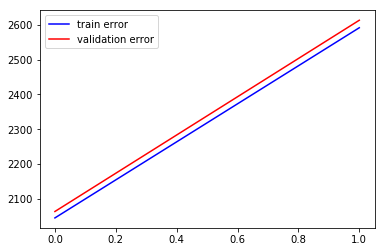

In [0]:
plt.plot(train_er1.values(),'b')
plt.plot(val_er1.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

##  Regression using k neighbour Regressor

In [0]:
##modelling using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error
train_er={}
val_er={}
knb={}
def print_model(zad,j,q,w,features_train,features_test,labels_train,labels_test):
    ##from sklearn import tree
    ##from sklearn.linear_model import LogisticRegression
    #for i in zad:
    while zad[1]<10:
        zad[2]=1
        while zad[2]<10:
            ##from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
            ##random_state=1
            clf = KNeighborsRegressor(n_neighbors=zad[1], leaf_size=zad[2])
            ### Gaussian Naive Bayes
            ### from sklearn.naive_bayes import GaussianNB
            ### clf = GaussianNB()

            ##SVM
            ##from sklearn import svm
            ##clf = svm.SVC(kernel="rbf") 

            clf.fit(features_train, labels_train)
            #clf.fit(x,y)

            prediction = clf.predict(features_train)
            pred=clf.predict(features_test)

            ##calculating accuracy
    #print accuracy_score(labels_test,prediction)
            print("No of Nearest neighbour are",zad[1])
    #print("Explained variance score")
    #print(explained_variance_score(labels_test,prediction))
    #print("r2 score")
    #print(r2_score(labels_test,prediction))
    #print("MSE")
    #print(mean_squared_error(labels_test,prediction))
    #print("Accuracy :")
    #print(accuracy_score(labels_test,prediction))
            print("train error:")
            print(mean_absolute_error(labels_train,prediction))
            print("validation error:")
            print(mean_absolute_error(labels_test,pred))
            train_er[j]=mean_absolute_error(labels_train,prediction)
            val_er[j]=mean_absolute_error(labels_test,pred)
            r=val_er[j]-train_er[j]
            if(train_er[j]<w):
                w=train_er[j]
                if(r<q):
                    q=r
                    k_neg=zad[1]
                    lef_size=zad[2]
                    qq=j+1
            print"*************************************************\n\n"
            zad[2]=zad[2]+2
            j=j+1
        zad[1]=zad[1]+2
    knb[1]=k_neg
    knb[2]=lef_size
    return qq,knb
def knb_model(zad,features_train,features_test,labels_train,labels_test):
    clf = KNeighborsRegressor(n_neighbors=zad[1], leaf_size=zad[2])
            ### Gaussian Naive Bayes
            ### from sklearn.naive_bayes import GaussianNB
            ### clf = GaussianNB()

            ##SVM
            ##from sklearn import svm
            ##clf = svm.SVC(kernel="rbf") 

    clf.fit(features_train, labels_train)
            #clf.fit(x,y)

    prediction = clf.predict(features_train)
    pred=clf.predict(features_test)

            ##calculating accuracy
    #print accuracy_score(labels_test,prediction)
    #print("Explained variance score")
    #print(explained_variance_score(labels_test,prediction))
    #print("r2 score")
    #print(r2_score(labels_test,prediction))
    #print("MSE")
    #print(mean_squared_error(labels_test,prediction))
    #print("Accuracy :")
    #print(accuracy_score(labels_test,prediction))
    train_er=mean_absolute_error(labels_train,prediction)
    val_er=mean_absolute_error(labels_test,pred)
    return train_er,val_er
            

In [0]:
zad={1:1,2:1}
model_no3,knb=print_model(zad,0,100000,1000000,features_train,features_test,labels_train,labels_test)

('No of Nearest neighbour are', 1)
train error:
1639.99046648
validation error:
1668.18292081
*************************************************


('No of Nearest neighbour are', 1)
train error:
1619.04335763
validation error:
1649.38808622
*************************************************


('No of Nearest neighbour are', 1)
train error:
1649.26271735
validation error:
1677.17403877
*************************************************


('No of Nearest neighbour are', 1)
train error:
1649.26271735
validation error:
1677.17403877
*************************************************


('No of Nearest neighbour are', 1)
train error:
1624.26151191
validation error:
1651.64977104
*************************************************


('No of Nearest neighbour are', 3)
train error:
1358.3778541
validation error:
1380.04565043
*************************************************


('No of Nearest neighbour are', 3)
train error:
1361.46388979
validation error:
1383.52673167
*******************************

Model number 22 is selected


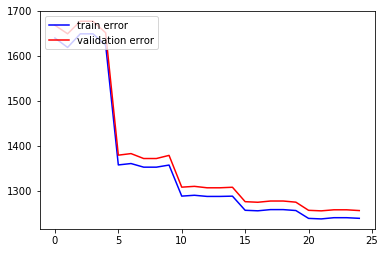

In [0]:
plt.plot(train_er.values(),'b')
plt.plot(val_er.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show
print"Model number",model_no3,"is selected"

## Regression using xgboost 

In [0]:
from sklearn.model_selection import train_test_split  
from xgboost.sklearn import XGBRegressor
val_errr={}
train_errr={}
def print_vals(vals,j,w,q,features_train,features_test,labels_train,labels_test):
    while vals[1]<20:
        vals[2]=1
        while vals[2]<20:
            max_depth = vals[1]
            min_child_weight = vals[2]
            subsample = 0.5
            colsample_bytree = 0.8
            objective = 'reg:linear'
            num_estimators = 1000
            learning_rate = 0.5
            features = features_train
            target = labels_train
            mdl = XGBRegressor(max_depth=max_depth,
            min_child_weight=min_child_weight,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            objective=objective,
            n_estimators=num_estimators,
            learning_rate=learning_rate)
            mdl.fit(features, target)
            predicted = mdl.predict(features_test)
            pred=mdl.predict(features_train)

#r2_score(predicted, y_test)
#explained_variance_score(y_test,predicted)

#print accuracy_score(labels_test,prediction)
            print'train error',mean_absolute_error(labels_train,pred)
            train_errr[j]=mean_absolute_error(labels_train,pred)
            print'validation error',mean_absolute_error(labels_test,predicted)
            val_errr[j]=mean_absolute_error(labels_test,predicted)
            r2=val_errr[j]-train_errr[j]
            if(train_errr[j]<w):
                w=train_errr[j]
                q=r2
                mxd=vals[1]
                mincd=vals[2]
                lr=vals[5]
                m2=j
            print'*************************************************************'
            j=j+1
            vals[2]=vals[2]+6
        vals[1]=vals[1]+6
    xgb[1]=mxd
    xgb[2]=mincd
    return m2,xgb
def xgb_model(vals,features_train,features_test,labels_train,labels_test):
    max_depth = vals[1]
    min_child_weight = vals[2]
            mdl = XGBRegressor(max_depth=max_depth,
            min_child_weight=min_child_weight,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            objective=objective,
            n_estimators=num_estimators,
            learning_rate=learning_rate)
            mdl.fit(features, target)
    subsample = 0.5
    colsample_bytree = 0.8
    objective = 'reg:linear'
    num_estimators = 1000
    learning_rate = 0.5
    features = features_train
    target = labels_train
    mdl = XGBRegressor(max_depth=max_depth,
    min_child_weight=min_child_weight,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    objective=objective,
    n_estimators=num_estimators,
    learning_rate=learning_rate)
    mdl.fit(features, target)
    predicted = mdl.predict(features_test)
    pred=mdl.predict(features_train)

#r2_score(predicted, y_test)
#explained_variance_score(y_test,predicted)

#print accuracy_score(labels_test,prediction)
    train_er=mean_absolute_error(labels_train,pred)
    val_er=mean_absolute_error(labels_test,predicted)
    return train_er,val_er

In [0]:
vals={1:2,2:1,3:0.5,4:1000,5:0.1}
j=0
m2=0
xgb={}
m2,xgb=print_vals(vals,j,100000,10000,features_train,features_test,labels_train,labels_test)

train error 1549.85753498
validation error 1573.78977992
*************************************************************
train error 1549.85753498
validation error 1573.78977992
*************************************************************
train error 1549.85753498
validation error 1573.78977992
*************************************************************
train error 1549.85753498
validation error 1573.78977992
*************************************************************


KeyboardInterrupt: 

Model no. Selected  0
[1730.8467929439093, 1539.0886514335186, 1730.8467929439093, 1539.0886514335186, 1730.8467929439093, 1539.0886514335186, 1730.8467929439093, 1539.0886514335186, 1730.8467929439093, 1539.0886514335186, 1218.2717519410598, 1189.7474680497535, 1218.2717519410598, 1189.7474680497535, 1218.2717519410598, 1189.7474680497535, 1218.2717519410598, 1189.7474680497535, 1218.2717519410598, 1189.7474680497535, 1184.9715622933941, 1186.9382806099838, 1184.9715622933941, 1186.9382806099838]


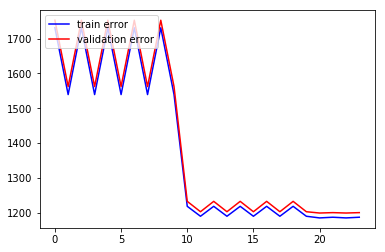

In [0]:
plt.plot(train_errr.values(),'b')
plt.plot(val_errr.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show
print "Model no. Selected ",m2
print(train_errr.values())

## Decision Tree Regressor

In [0]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn import tree
features = features_train
target = labels_train
val_er1={}
train_er1={}
dtr={}
def print_model1(val,i,w,q,m,features_train,features_test,labels_train,labels_test,features,target):
    while val[1]<3:
        val[2]=2
        while val[2]<5:
            val[3]=1
            while val[3]<3:
                model = tree.DecisionTreeRegressor( max_depth=val[1], min_samples_split=val[2], min_samples_leaf=val[3]) 
                model.fit(features, target)
                predicted = model.predict(features_train)
                pred=model.predict(features_test)
#r2_score(predicted, y_test)
                print'Train error',mean_absolute_error(labels_train,predicted)
                train_er1[i]=mean_absolute_error(labels_train,predicted)
                print'validation error',mean_absolute_error(labels_test,pred)
                val_er1[i]=mean_absolute_error(labels_test,pred)
                dif=val_er1[i]-train_er1[i]
                if(train_er1[i]<w):
                    w=train_er1[i]
                    q=dif
                    dtr[1]=val[1]
                    dtr[2]=val[2]
                    dtr[3]=val[3]
                    m=i
                print'************************************************'
                i=i+1
                val[3]=val[3]+1
            val[2]=val[2]+1
        val[1]=val[1]+1
    return w,q,m,dtr

def dtr_model(val,features_train,features_test,labels_train,labels_test,features,target):
    model = tree.DecisionTreeRegressor( max_depth=val[1], min_samples_split=val[2], min_samples_leaf=val[3]) 
    model.fit(features, target)
    predicted = model.predict(features_train)
    pred=model.predict(features_test)
#r2_score(predicted, y_test)
    tra=mean_absolute_error(labels_train,predicted)
    val=mean_absolute_error(labels_test,pred)
    return tra,val

In [0]:
i=0
features = features_train
w=100000
q=100000
m=0
target = labels_train
val={1:1,2:2,3:1}
w,q,m,dtr=print_model1(val,i,w,q,m,features_train,features_test,labels_train,labels_test,features,target)

Train error 2077.83318116
validation error 2094.59500532
************************************************
Train error 2077.83318116
validation error 2094.59500532
************************************************
Train error 2077.83318116
validation error 2094.59500532
************************************************
Train error 2077.83318116
validation error 2094.59500532
************************************************
Train error 2077.83318116
validation error 2094.59500532
************************************************
Train error 2077.83318116
validation error 2094.59500532
************************************************
Train error 2061.16643446
validation error 2078.94045784
************************************************
Train error 2061.16643446
validation error 2078.94045784
************************************************
Train error 2061.16643446
validation error 2078.94045784
************************************************
Train error 2061.16643446
validation error 207

{1: 2, 2: 2, 3: 1}
model selected is model no. 6


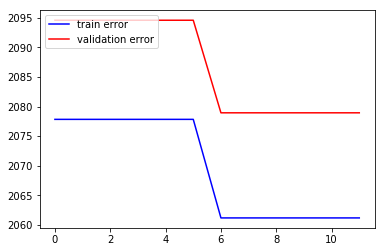

In [0]:
plt.plot(train_er1.values(),'b')
plt.plot(val_er1.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show
print(dtr)
print "model selected is model no.",m

## GradientBoostingRegressor model

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
val_er2={}
train_er2={}
def print_model2(w,q,val,i,gbr,features_train,features_test,labels_train,labels_test,features,target):
    while val[1]<100:
        val[2]=1
        while val[2]<20:
            clf = GradientBoostingRegressor(n_estimators=val[1], learning_rate=1.0, max_depth=val[2]) 
            clf.fit(features, target) # the default loss function is friedman_mse
            predicted = clf.predict(features_test)
            pred=clf.predict(features_train)
                #r2_score(predicted, y_test)
                #explained_variance_score(predicted, y_test)
            print 'Train error',mean_absolute_error(labels_train,pred)
            train_er2[i]=mean_absolute_error(labels_train,pred)
            print'validation error',mean_absolute_error(labels_test,predicted)
            val_er2[i]=mean_absolute_error(labels_test,predicted)
            t=train_er[i]
            r=val_er[i]
            if(train_er[i]<w):
                w=train_er[i]
                n_est=val[1]
                mxd=val[2]
                qq=i+1
            print'*************************************************************'
            val[2]=val[2]+4
            i=i+1
        val[1]=val[1]+50
    return qq,w,r,n_est,mxd
def gbr_model(n_est,mxd,features_train,features_test,labels_train,labels_test,features,target):
    clf = GradientBoostingRegressor(n_estimators=n_est, learning_rate=1.0, max_depth=mxd) 
    clf.fit(features, target) # the default loss function is friedman_mse
    predicted = clf.predict(features_test)
    pred=clf.predict(features_train)
    train_er2=mean_absolute_error(labels_train,pred)  
    val_er2=mean_absolute_error(labels_test,predicted)
    return train_er2,val_er2

In [0]:
i=0
valgbr={1:10,2:1,3:1}
gbr={}
q=100000
w=100000
md_no,v,t,n,m=print_model2(w,q,valgbr,i,gbr,features_train,features_test,labels_train,labels_test,features,target)


Train error 2010.48681487
validation error 2028.62401523
*************************************************************
Train error 1680.00526974
validation error 1698.19876062
*************************************************************
Train error 1240.95130848
validation error 1257.09049852
*************************************************************
Train error 1184.80283577
validation error 1199.20532339
*************************************************************
Train error 1184.66482308
validation error 1199.02181696
*************************************************************
Train error 1987.59217205
validation error 2004.70015507
*************************************************************
Train error 1268.42212043
validation error 1286.4037448
*************************************************************
Train error 1184.66482784
validation error 1199.02180321
*************************************************************
Train error 1184.66482308
validation error 1199.0

60


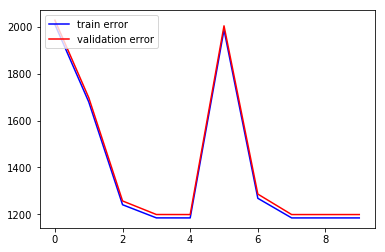

In [0]:
plt.plot(train_er2.values(),'b')
plt.plot(val_er2.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

### LASSO REGRESSION

In [0]:
from sklearn import linear_model
val_err4={}
train_err4={}
nor=True
pre=True
def print_model4(i,j,q,w,m,u,nor,pre,features_train,features_test,labels_train,labels_test,features,target):
            clf = linear_model.Lasso(normalize=i,precompute=j)
            clf.fit(features_train,labels_train)
            prediction = clf.predict(features_test)
            pred=clf.predict(features_train)
            #print("Accuracy :")
            #print(accuracy_score(labels_test,prediction))
            print'Train error',mean_absolute_error(labels_train,pred)
            train_err4[u]=mean_absolute_error(labels_train,pred)
            print'Validation error :',mean_absolute_error(labels_test,prediction)
            val_err4[u]=mean_absolute_error(labels_test,prediction)
            r1=val_err4[u]-train_err4[u]
            if(train_err4[u]<w):
                w=train_err4[u]
                q=r1
                nor=i
                pre=j
                m=u
            print'*************************************************************'
            return m,q,w,val_err4[u],train_err4[u],nor,pre
    

In [0]:
a={1:True,2:False}
valls={1:True,2:False}
w=100000
q=100000
m=0
u=0
for i in a:
    for j in valls:
        m,q,w,t,v,nor,pre=print_model4(a[i],valls[j],q,w,m,u,nor,pre,features_train,features_test,labels_train,labels_test,features,target)
        u=u+1
print"Model no. selected is",m

Train error 2117.53065884
Validation error : 2135.44560664
*************************************************************
Train error 2117.53065884
Validation error : 2135.44560664
*************************************************************
Train error 2044.73134937
Validation error : 2063.20872621
*************************************************************
Train error 2044.73134937
Validation error : 2063.20872621
*************************************************************
Model no. selected is 2


The model no selected is 2


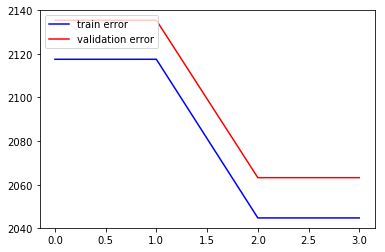

In [0]:
plt.plot(train_err4.values(),'b')
plt.plot(val_err4.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show
print"The model no selected is",m

## RIDGE REGRESSION

In [0]:
# TRAIL RIDGE
from sklearn.linear_model import Ridge
import numpy as np
val_err3={}
train_err3={}
n_samples, n_features = 10, 5
np.random.seed(0)
def print_model7(m,value,value1,k,i,j,w,m1,m2,sol,nor,features_train,features_test,labels_train,labels_test,features,target):
        y = labels_train
        X =features_train
        clf = Ridge(solver=value,normalize=value1)
        clf.fit(X, y) 
        prediction = clf.predict(features_test)
        pred=clf.predict(features_train)
        #print("Accuracy :")
        #print(accuracy_score(dfg['Customers'],prediction))
        print 'solver',value,'normalize',value1
        print'Train error :',mean_absolute_error(labels_train,pred)
        train_err3[k]=mean_absolute_error(labels_train,pred)
        print'validation error :',mean_absolute_error(labels_test,prediction)
        val_err3[k]=mean_absolute_error(labels_test,prediction)
        if(train_err3[k]<w):
            w=train_err3[k]
            sol=value
            nor=value1
            m1=m2
        m2=m2+1
        t5=train_err3[m]
        v5=val_err3[m]
        k=k+1
        print'*********************************************************'
        return m1,w,t5,v5,sol,nor,k
    

In [0]:
value={1:'auto',2:'svd',3:'cholesky',4:'sparse_cg',5:'sag'}
value1={1:True,2:False}
h=0
l=1
sol=0
nor=0
w=100000
m1=0.
m2=0
m=0
k=0
for j in value1:
    for i in value:
        m1,w,t3,v3,sol,nor,k=print_model7(m,value[i],value1[j],k,i,j,w,m1,m2,sol,nor,features_train,features_test,labels_train,labels_test,features,target)

solver auto normalize True
Train error : 2102.77392555
validation error : 2122.22030406
*********************************************************
solver svd normalize True
Train error : 2102.77392555
validation error : 2122.22030406
*********************************************************
solver cholesky normalize True
Train error : 2102.77392555
validation error : 2122.22030406
*********************************************************
solver sparse_cg normalize True
Train error : 2102.77225003
validation error : 2122.2180475
*********************************************************
solver sag normalize True
Train error : 2102.81529569
validation error : 2122.26426006
*********************************************************
solver auto normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*********************************************************
solver svd normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*****************************

model no selected is 0
False auto


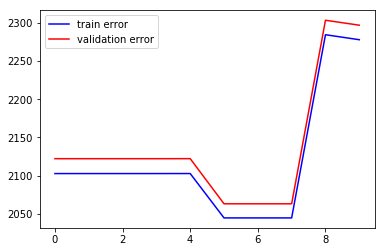

In [0]:
plt.plot(train_err3.values(),'b')
plt.plot(val_err3.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show
print"model no selected is",m1
print nor,sol

## Preprocessing 2

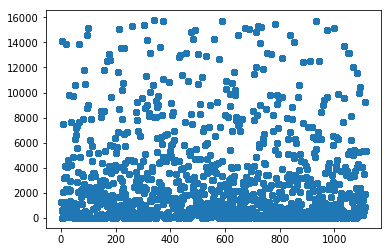

In [0]:
#Checking for possibility of any outliers still being present
plt.scatter(combined_train_data['Store'], combined_train_data['CompetitionDistance'])
plt.show()

In [0]:
l1=combined_train_data.CompetitionDistance.quantile(0.05)
print("5th percentile is %f" % l1)

5th percentile is 0.000000


In [0]:
l2=combined_train_data.CompetitionDistance.quantile(0.99)
print("99th percentile is %f" % l2)

99th percentile is 15140.000000


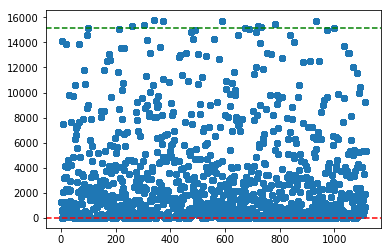

In [0]:
#ax=plt.subplots()
ax=plt.scatter(combined_train_data['Store'], combined_train_data['CompetitionDistance'])
axhline(l1,color='red',linestyle='--',label='5th Percentile')
axhline(l2,color='green',linestyle='--',label='95th percentile')
#ax.label(['5th Percentile','95th Percentile'])
plt.show()

In [0]:
combined_train_data2=combined_train_data[np.abs(combined_train_data.CompetitionDistance-combined_train_data.CompetitionDistance.mean())<=(3*combined_train_data.CompetitionDistance.std())]

In [0]:
final_size=combined_train_data2.shape[0]
print(final_size)

826882


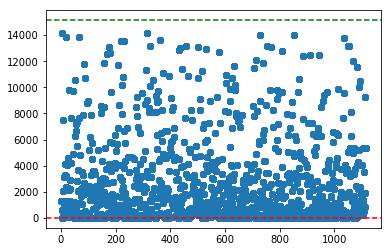

In [0]:
#ax=plt.subplots()
ax=plt.scatter(combined_train_data2['Store'], combined_train_data2['CompetitionDistance'])
axhline(l1,color='red',linestyle='--',label='5th Percentile')
axhline(l2,color='green',linestyle='--',label='95th percentile')
#ax.label(['5th Percentile','95th Percentile'])
plt.show()

In [0]:
data_lost=initial_size-final_size
loss=(data_lost/initial_size)*100

In [0]:
print("The pct of data lost as outliers is %f" % loss)

The pct of data lost as outliers is 0.000000


In [0]:
(combined_train_data['CompetitionDistance'] == median_cd).any()

False

In [0]:
mean_cd = combined_train_data2['CompetitionDistance'].mean(skipna=True)
print("the mean distance is %d" % mean_cd)

the mean distance is 2814


In [0]:
#Replacing the unkown CompetitionDistance to the Arithmetic Mean
combined_train_data['CompetitionDistance']=combined_train_data.CompetitionDistance.mask(combined_train_data.CompetitionDistance == median_cd,mean_cd)

In [0]:
combined_train_data2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,NewAssortment,NewStoreType
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3


In [0]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

In [0]:
columns_to_convert = ['Assortment', 'StoreType']

for column in columns_to_convert:
    combined_train_data2 = convert_to_binary(df=combined_train_data2, column_to_convert=column)
    combined_train_data2.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...completed")

C:\Users\Hp\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Hp\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


One Hot Encoding categorical data...completed


In [0]:
combined_train_data2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,PromoInterval,NewAssortment,NewStoreType,Assor_a,Assor_c,Assor_b,Store_c,Store_a,Store_d,Store_b
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,0,1,3,1,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270.0,...,0,1,3,1,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1270.0,...,0,1,3,1,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1270.0,...,0,1,3,1,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1270.0,...,0,1,3,1,0,0,1,0,0,0


## MODEL EVALUATION

In [0]:
validationError={'linear':0,'kneighbour:':0,'Xgboost':0,'Dtregressor':0,'GradeintBoost':0,'Lasso':0,'Ridge':0}
TrainError={'linear':0,'kneighbour:':0,'Xgboost':0,'Dtregressor':0,'GradeintBoost':0,'Lasso':0,'Ridge':0}

### Linear Regression

In [0]:
from sklearn import cross_validation
# create X and y
size=0.1
linear_train=[]
linear_test=[]
siz=[]
while size<1:
    combined_train_data_new = combined_train_data2.sample(frac=size)
    feature_cols1 = ['CompetitionDistance','Promo','Promo2','Assor_a','Assor_b','Assor_c','Store_a','Store_b','Store_c','Store_d']
    X1 = combined_train_data_new[feature_cols1]
    y1 = combined_train_data_new.Sales
    #test1=combined_test_data
    features_train1, features_test1, labels_train1, labels_test1 =cross_validation.train_test_split(X1, y1, test_size=0.3, random_state=42)
    q5,w,q,t,v=linear_reg(fit_ncpt,w,q,q5,features_train1,features_test1,labels_train1,labels_test1)
    linear_train.append(t)
    linear_test.append(v)
    siz.append(size*100)
    size=size+0.1

NameError: name 'fit_ncpt' is not defined

<function matplotlib.pyplot.show>

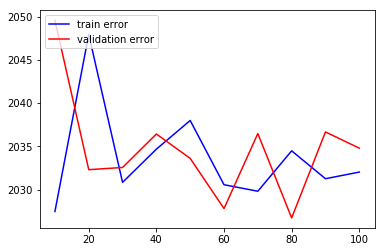

In [0]:
plt.plot(siz,linear_train,'b')
plt.plot(siz,linear_test,'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

### K-neighbour Regressor

In [0]:
# create X and y
size=0.1
linear_traink=[]
linear_testk=[]
sizk=[]
while size<1:
    combined_train_data_new = combined_train_data2.sample(frac=size)
    feature_cols1 = ['CompetitionDistance','Promo','Promo2','Assor_a','Assor_b','Assor_c','Store_a','Store_b','Store_c','Store_d']
    X1 = combined_train_data_new[feature_cols1]
    y1 = combined_train_data_new.Sales
    test1=combined_test_data
    features_train1, features_test1, labels_train1, labels_test1 =cross_validation.train_test_split(X1, y1, test_size=0.3, random_state=42)
    t,v=knb_model(knb,features_train1,features_test1,labels_train1,labels_test1)
    linear_traink.append(t)
    linear_testk.append(v)
    sizk.append(size*100)
    print(size*10)
    size=size+0.1

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


<function matplotlib.pyplot.show>

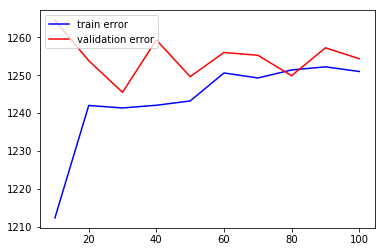

In [0]:
plt.plot(sizk,linear_traink,'b')
plt.plot(sizk,linear_testk,'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

### Decision Tree Model

In [0]:
# create X and y
size=0.1
linear_traind=[]
linear_testd=[]
sizd=[]
i=0
while size<1:
    combined_train_data_new = combined_train_data2.sample(frac=size)
    feature_cols1 = ['CompetitionDistance','Promo','Promo2','Assor_a','Assor_b','Assor_c','Store_a','Store_b','Store_c','Store_d']
    X1 = combined_train_data_new[feature_cols1]
    y1 = combined_train_data_new.Sales
    test1=combined_test_data
    features_train1, features_test1, labels_train1, labels_test1 =cross_validation.train_test_split(X1, y1, test_size=0.3, random_state=42)
    features1 = features_train1
    target1 = labels_train1
    t,v=dtr_model(dtr,features_train1,features_test1,labels_train1,labels_test1,features1,target1)
    linear_traind.append(t)
    linear_testd.append(v)
    sizd.append(size*100)
    print(size*10)
    size=size+0.1

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


<function matplotlib.pyplot.show>

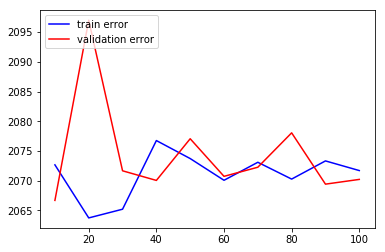

In [0]:
plt.plot(sizd,linear_traind,'b')
plt.plot(sizd,linear_testd,'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

### GradientBoosting Model

In [0]:
size=0.1
linear_traing=[]
linear_testg=[]
sizg=[]
i=0
while size<1:
    combined_train_data_new = combined_train_data2.sample(frac=size)
    feature_cols1 = ['CompetitionDistance','Promo','Promo2','Assor_a','Assor_b','Assor_c','Store_a','Store_b','Store_c','Store_d']
    X1 = combined_train_data_new[feature_cols1]
    y1 = combined_train_data_new.Sales
    test1=combined_test_data
    features_train1, features_test1, labels_train1, labels_test1 =cross_validation.train_test_split(X1, y1, test_size=0.3, random_state=42)
    features1 = features_train1
    target1 = labels_train1
    t,v=gbr_model(n,m,features_train1,features_test1,labels_train1,labels_test1,features1,target1)
    linear_traing.append(t)
    linear_testg.append(v)
    sizg.append(size*100)
    print(size*10)
    size=size+0.1

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


<function matplotlib.pyplot.show>

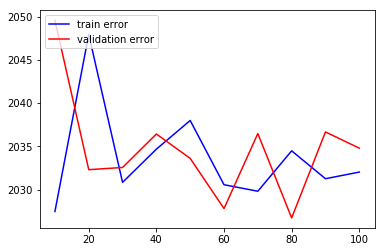

In [0]:
plt.plot(siz,linear_train,'b')
plt.plot(siz,linear_test,'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

### Lasso 

In [0]:
size=0.1
linear_trainl=[]
linear_testl=[]
sizl=[]
i=0
while size<1:
    combined_train_data_new = combined_train_data2.sample(frac=size)
    feature_cols1 = ['CompetitionDistance','Promo','Promo2','Assor_a','Assor_b','Assor_c','Store_a','Store_b','Store_c','Store_d']
    X1 = combined_train_data_new[feature_cols1]
    y1 = combined_train_data_new.Sales
    test1=combined_test_data
    features_train1, features_test1, labels_train1, labels_test1 =cross_validation.train_test_split(X1, y1, test_size=0.3, random_state=42)
    features1 = features_train1
    target1 = labels_train1
    m,q,w,t,v,nor,pre=m,q,w,t,v,nor,pre=print_model4(nor,pre,q,w,m,u,nor,pre,features_train1,features_test1,labels_train1,labels_test1,features1,target1)
    linear_trainl.append(t)
    linear_testl.append(v)
    sizl.append(size*100)
   # print(size*10)
    size=size+0.1

Train error 2029.08847496
Validation error : 2021.07076925
*************************************************************
Train error 2034.70960235
Validation error : 2026.20581494
*************************************************************
Train error 2034.31145709
Validation error : 2038.34199134
*************************************************************
Train error 2033.288147
Validation error : 2027.03157627
*************************************************************
Train error 2032.65937471
Validation error : 2032.22140425
*************************************************************
Train error 2034.69542982
Validation error : 2042.97968226
*************************************************************
Train error 2028.2601384
Validation error : 2038.78203923
*************************************************************
Train error 2031.17470868
Validation error : 2031.5605531
*************************************************************
Train error 2036.91535981
Validation

<function matplotlib.pyplot.show>

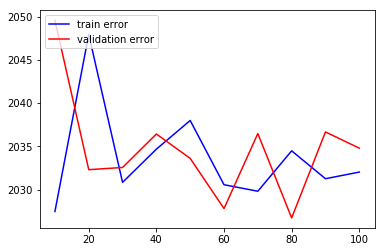

In [0]:
plt.plot(siz,linear_train,'b')
plt.plot(siz,linear_test,'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

### RIDGE REGRESSION

In [0]:
# create X and y
size=0.1
linear_trainr=[]
linear_testr=[]
sizr=[]
m=0
while size<1:
    combined_train_data_new = combined_train_data2.sample(frac=size)
    feature_cols1 = ['CompetitionDistance','Promo','Promo2','Assor_a','Assor_b','Assor_c','Store_a','Store_b','Store_c','Store_d']
    X1 = combined_train_data_new[feature_cols1]
    y1 = combined_train_data_new.Sales
    test1=combined_test_data
    features_train1, features_test1, labels_train1, labels_test1 =cross_validation.train_test_split(X1, y1, test_size=0.3, random_state=42)
    m1,w,t3,v3,sol,nor,k=print_model7(m,sol,nor,k,i,j,w,q,m1,sol,nor,features_train,features_test,labels_train,labels_test,features,target)
    linear_trainr.append(t3)
    linear_testr.append(v3)
    sizr.append(size*100)
    size=size+0.1
    m=m+1



solver auto normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*********************************************************
solver auto normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*********************************************************
solver auto normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*********************************************************
solver auto normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*********************************************************
solver auto normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*********************************************************
solver auto normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*********************************************************
solver auto normalize False
Train error : 2044.80912298
validation error : 2063.27849846
*****************************

[2102.773925546157, 2102.773925546157, 2102.773925546157, 2102.7722500280784, 2102.8152956889621, 2044.8091229845718, 2044.8091229845718, 2044.8091229845718, 2284.2436356445692, 2277.7132548111731]
[2122.2203040633608, 2122.2203040633608, 2122.2203040633608, 2122.2180474960469, 2122.2642600619665, 2063.2784984577725, 2063.2784984577725, 2063.2784984577725, 2303.1675127854633, 2296.6916622848994]


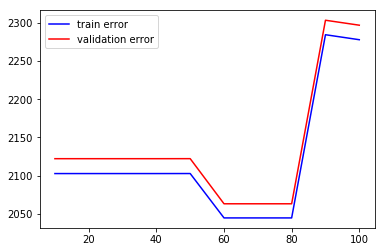

In [0]:
plt.plot(sizr,linear_trainr,'b')
plt.plot(sizr,linear_testr,'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show
print linear_trainr
print linear_testr

## MODEL SELECTION 2

### Using Randomised CV


### Learning Curves

In [0]:
feature_cols1 = ['CompetitionDistance','Promo','Promo2','Assor_a','Assor_b','Assor_c','Store_a','Store_b','Store_c','Store_d']
X1 = combined_train_data2[feature_cols1]
Y1 = combined_train_data2.Sales
features_train1, features_test1, labels_train1, labels_test1 =cross_validation.train_test_split(X1,Y1, test_size=0.3, random_state=42)
def learning_curve1(size):
    a=combined_train_data2.sample(frac=size)
    x=a[feature_cols1]
    y=a.Sales
    return x,y

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(mdl, title, X, y, ylim=None, cv=10,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    train_sizes, train_scores, test_scores = learning_curve(
        mdl, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Validation score")
    plt.legend(['Training score', 'Validation score'],loc='upper left')
    plt.plot()
    #plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


### Linear Regression

In [0]:
from sklearn.model_selection import train_test_split  
from xgboost.sklearn import XGBRegressor

import scipy.stats as st
one_to_left = st.beta(15, 1)  
from_zero_positive = st.expon(0, 50)
params1 = {  
    "fit_intercept": [True,False],
    "normalize": [True,False],
    "copy_X":[True,False],
    "n_jobs":st.uniform(1,30)
}
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
regr = linear_model.LinearRegression(params1)
# Train the model using the training sets
gs = RandomizedSearchCV(regr, params1, n_jobs=1) 
gs0 = RandomizedSearchCV(regr, params1, n_jobs=1) 
gs.fit(features_train, labels_train) 
gs0.fit(features_train1, labels_train1) 
ans = gs.predict(features_test)
pred = gs.predict(features_train)
ans1 = gs0.predict(features_test1)
pred1 = gs0.predict(features_train1)
print'***************************************************************'
print'Preprocessing 1'
print'Training Error',mean_absolute_error(labels_train,pred)
print'Validation Error',mean_absolute_error(labels_test,ans)
print'***************************************************************'
print'Preprocessing 2'
print'Training Error',mean_absolute_error(labels_train1,pred1)
print'Validation Error',mean_absolute_error(labels_test1,ans1)

***************************************************************
Preprocessing 1
Training Error 2048.15969723
Validation Error 2044.96586367
***************************************************************
Preprocessing 2
Training Error 2026.48171636
Validation Error 2028.93158151


<module 'matplotlib.pyplot' from 'C:\Users\Hp\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

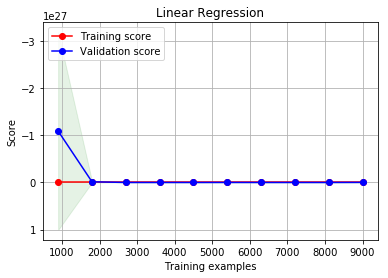

In [0]:
x1=X1.head(10000)
y1=Y1.head(10000)
plot_learning_curve(gs0,"Linear Regression", x1, y1,  cv=10, n_jobs=4)

### XGBoost

In [0]:
from sklearn.model_selection import train_test_split  
from xgboost.sklearn import XGBRegressor

import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    "reg_alpha": from_zero_positive,
    "min_child_weight": from_zero_positive,
}
from sklearn.model_selection import RandomizedSearchCV
mdl = XGBRegressor()
gs1 = RandomizedSearchCV(mdl, params, n_jobs=1) 
gs12 = RandomizedSearchCV(mdl, params, n_jobs=1) 
gs1.fit(features_train, labels_train) 
gs12.fit(features_train1, labels_train1) 
ans = gs1.predict(features_test)
pred = gs1.predict(features_train)
ans1 = gs12.predict(features_test1)
pred1 = gs12.predict(features_train1)
print'***************************************************************'
print'Preprocessing 1'
print'Training Error',mean_absolute_error(labels_train,pred)
print'Validation Error',mean_absolute_error(labels_test,ans)
print'***************************************************************'
print'Preprocessing 2'
print'Training Error',mean_absolute_error(labels_train1,pred1)
print'Validation Error',mean_absolute_error(labels_test1,ans1)

***************************************************************
Preprocessing 1
Training Error 1185.64568596
Validation Error 1195.38561567
***************************************************************
Preprocessing 2
Training Error 1187.14571513
Validation Error 1194.18516171


<module 'matplotlib.pyplot' from 'C:\Users\Hp\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

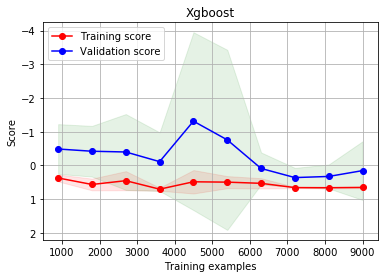

In [0]:
plot_learning_curve(gs12,"Xgboost", x1, y1,  cv=10, n_jobs=4)

### DECISION TREE REGRESSOR

In [0]:
from sklearn import tree
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(1, 50)

# Decision tree
params5 = {
           "criterion"          :['mse','friedman_mse'],
           "max_features"      : st.randint(2,6),
           "max_depth"         : st.randint(1, 200),
           "min_samples_split" : st.randint(2, 100) 
}
model = tree.DecisionTreeRegressor() 
gs2 = RandomizedSearchCV(model, params5, n_jobs=1) 
gs21 = RandomizedSearchCV(model, params5, n_jobs=1) 
gs2.fit(features_train, labels_train) 
gs21.fit(features_train1, labels_train1) 
ans = gs2.predict(features_test)
pred = gs2.predict(features_train)
ans1 = gs21.predict(features_test1)
pred1 = gs21.predict(features_train1)
print'***************************************************************'
print'Preprocessing 1'
print'Training Error',mean_absolute_error(labels_train,pred)
print'Validation Error',mean_absolute_error(labels_test,ans)
print'***************************************************************'
print'Preprocessing 2'
print'Training Error',mean_absolute_error(labels_train1,pred1)
print'Validation Error',mean_absolute_error(labels_test1,ans1)

***************************************************************
Preprocessing 1
Training Error 1245.97177788
Validation Error 1265.47978039
***************************************************************
Preprocessing 2
Training Error 1258.25251448
Validation Error 1263.99968024


<module 'matplotlib.pyplot' from 'C:\Users\Hp\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

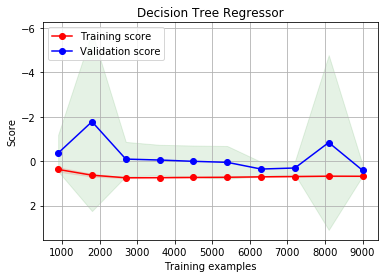

In [0]:
plot_learning_curve(gs2,"Decision Tree Regressor", x1, y1,  cv=10, n_jobs=4)

### RIDGE REGRESSION

In [0]:
from sklearn.linear_model import Ridge
import numpy as np
#ridge regression
import scipy.stats as st
params3 = {
    "fit_intercept": [True,False],
    "normalize": [True,False],
    "copy_X":[True,False],
    "max_iter":st.randint(1000,1500),
    "solver" :['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']   
}
from sklearn.model_selection import RandomizedSearchCV
clf1 = Ridge()
gs5 = RandomizedSearchCV(clf1, params3, n_jobs=1) 
gs51 = RandomizedSearchCV(clf1, params3, n_jobs=1) 
gs5.fit(features_train, labels_train) 
gs51.fit(features_train1, labels_train1) 
ans = gs5.predict(features_test)
pred = gs5.predict(features_train)
ans1 = gs51.predict(features_test1)
pred1 = gs51.predict(features_train1)
print'***************************************************************'
print'Preprocessing 1'
print'Training Error',mean_absolute_error(labels_train,pred)
print'Validation Error',mean_absolute_error(labels_test,ans)
print'***************************************************************'
print'Preprocessing 2'
print'Training Error',mean_absolute_error(labels_train1,pred1)
print'Validation Error',mean_absolute_error(labels_test1,ans1)

***************************************************************
Preprocessing 1
Training Error 2048.15949484
Validation Error 2044.96537894
***************************************************************
Preprocessing 2
Training Error 2026.48163316
Validation Error 2028.93185532


<module 'matplotlib.pyplot' from 'C:\Users\Hp\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

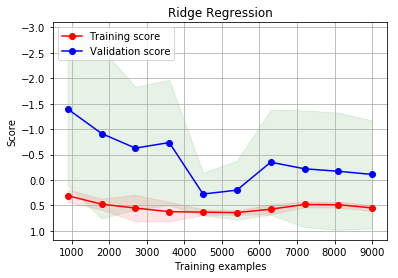

In [0]:
plot_learning_curve(gs51,"Ridge Regression", x1, y1,  cv=10, n_jobs=4)

### LASSO REGRESSION

In [0]:
from sklearn import linear_model

params4 = {
        "fit_intercept" : [True, False],
        "normalize" : [True, False],
        "precompute" : [True, False],
        "copy_X" :[True,False],
        "warm_start" :[True,False]   
}

clf = linear_model.Lasso()
gs6 = RandomizedSearchCV(clf, params4, n_jobs=1) 
gs61 = RandomizedSearchCV(clf, params4, n_jobs=1) 
gs6.fit(features_train, labels_train) 
gs61.fit(features_train1, labels_train1) 
ans = gs6.predict(features_test)
pred = gs6.predict(features_train)
ans1 = gs61.predict(features_test1)
pred1 = gs61.predict(features_train1)
print'***************************************************************'
print'Preprocessing 1'
print'Training Error',mean_absolute_error(labels_train,pred)
print'Validation Error',mean_absolute_error(labels_test,ans)
print'***************************************************************'
print'Preprocessing 2'
print'Training Error',mean_absolute_error(labels_train1,pred1)
print'Validation Error',mean_absolute_error(labels_test1,ans1)

***************************************************************
Preprocessing 1
Training Error 2048.09161955
Validation Error 2044.89040467
***************************************************************
Preprocessing 2
Training Error 2025.93767618
Validation Error 2028.38999823


<module 'matplotlib.pyplot' from 'C:\Users\Hp\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

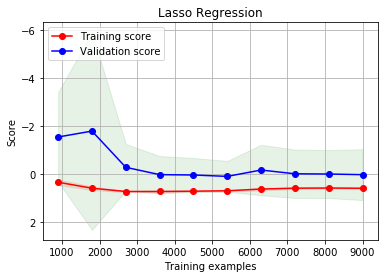

In [0]:
plot_learning_curve(gs61,"Lasso Regression", x1, y1,  cv=10, n_jobs=4)

### Gradient Boosting Algorithm

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
# gradient boosting 
params5 = { 
    
    "criterion":['mse','friedman_mse'],
    "n_estimators":st.randint(1,20),
    "max_depth":st.randint(1,10),
    "min_weight_fraction_leaf":st.randint(0.0,1),  
}
clf3 = GradientBoostingRegressor() 
clf3.fit(features_train,labels_train)# the default loss function is friedman_mse
gs7 = RandomizedSearchCV(clf3, params5, n_jobs=1) 
gs71 = RandomizedSearchCV(clf3, params5, n_jobs=1) 
gs7.fit(features_train, labels_train) 
gs71.fit(features_train1, labels_train1) 
ans = gs7.predict(features_test)
pred = gs7.predict(features_train)
ans1 = gs71.predict(features_test1)
pred1 = gs71.predict(features_train1)
print'***************************************************************'
print'Preprocessing 1'
print'Training Error',mean_absolute_error(labels_train,pred)
print'Validation Error',mean_absolute_error(labels_test,ans)
print'***************************************************************'
print'Preprocessing 2'
print'Training Error',mean_absolute_error(labels_train1,pred1)
print'Validation Error',mean_absolute_error(labels_test1,ans1)

***************************************************************
Preprocessing 1
Training Error 1695.07064751
Validation Error 1699.58395502
***************************************************************
Preprocessing 2
Training Error 1917.99151912
Validation Error 1922.62512532


<module 'matplotlib.pyplot' from 'C:\Users\Hp\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

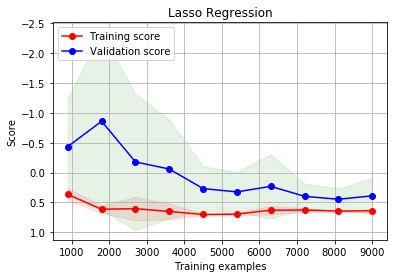

In [0]:
plot_learning_curve(gs71,"Lasso Regression", x1, y1,  cv=10, n_jobs=4)